In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
np.array(sorted(list(range(5))))

array([0, 1, 2, 3, 4])

In [3]:
np.random.seed(50)
n = 40

X = np.array(sorted(list(range(10))*4)) + np.random.normal(size=n, scale=.5)
y = np.array(sorted(list(range(10))*4)) + np.random.normal(size=n, scale=2.25)

# generate prices to be roughly $600 per square-foot
# sqft = [220, 500, 550, 600, 750, 800, 900, 920, 1385, 1200, 1400, 1500, 1550, 1800, 2000]
# prices = [np.round(i * np.random.normal(600, 200), 0)**(1/2) for i in sqft]
sqft = X + 1
prices = y + 2
df = pd.DataFrame({'sqft': sqft, 'price': prices})
df.head()

,sqft,price
0,0.219824,1.549063
1,0.984511,3.671836
2,0.689536,3.929064
3,0.267710,-1.388926
4,2.705973,-0.749292


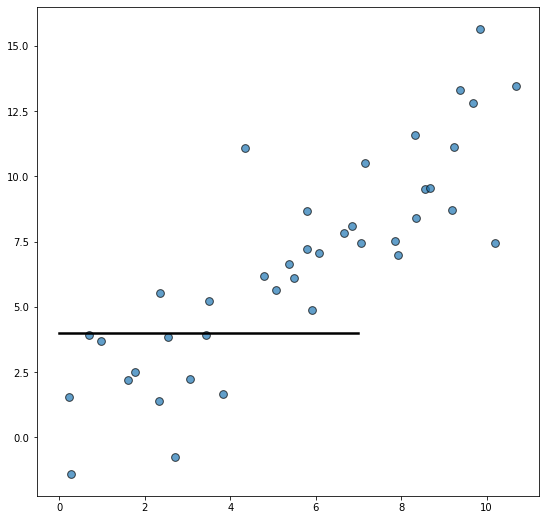

In [4]:
# Generate data
x = df.sqft
y = df.price

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
a_flat = 4
b_flat = 0

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 7, num=1000)

# Plot regression line
ax.plot(xseq, a_flat + b_flat * xseq, color="k", lw=2.5);

intercept:  0.5444166165823855
slope:  1.1049975422309999


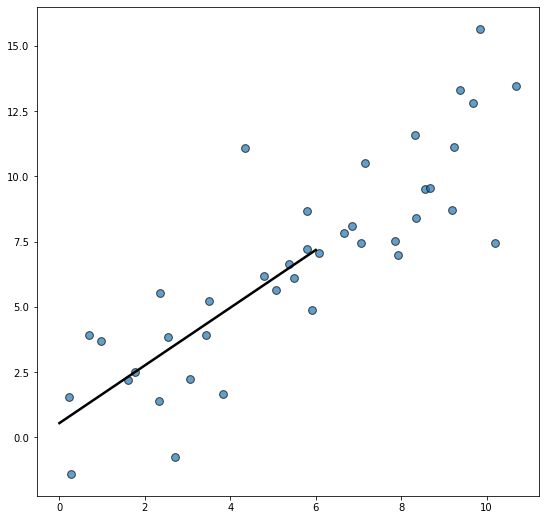

In [5]:
# Generate data
x = df.sqft
y = df.price

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
print('intercept: ', a)
print('slope: ', b)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 6, num=1000)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

intercept:  2.7836038483169423
slope:  0.09742747490107824


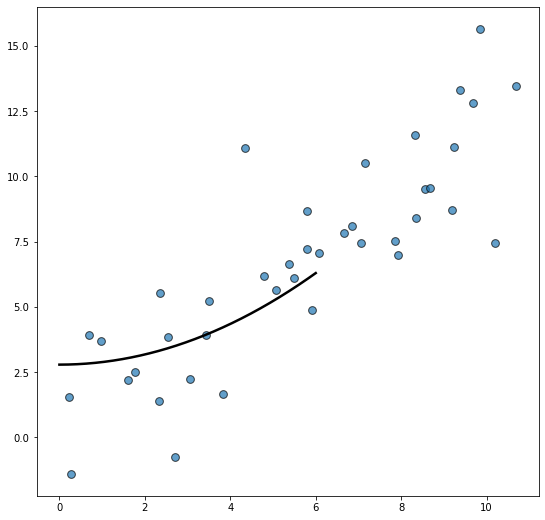

In [6]:
# Generate data
x = df.sqft
y = df.price

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b_sqrt, a_sqrt = np.polyfit((x)**2, y, deg=1)
print('intercept: ', a_sqrt)
print('slope: ', b_sqrt)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 6, num=1000)

# Plot regression line
ax.plot(xseq, a_sqrt + b_sqrt * (xseq)**2, color="k", lw=2.5);

In [7]:
df['regressionLine'] = np.round(a + b * df['sqft'], 5)
df['regressionLineFlat'] = np.round(a_flat + b_flat * df['sqft'], 5)
df['regressionLineSqrt'] = np.round(a_sqrt + b_sqrt * (df['sqft'])**2, 5)
# df['x'] = np.linspace(0, 6, df.shape[0])

In [8]:
df['sqft'] = df.sqft.astype(np.float)

In [9]:
df.sort_values(by=['sqft', 'price'], inplace=True, ascending=True)
# df

In [10]:
df.to_json('scatterData2.json', orient='records')

# Gradients

In [11]:
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.001, iterations=10000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        b = 0
        m = 5
        n = X.shape[0]
        for _ in range(self.iterations):
            b_gradient = -2 * np.sum(y - m*X + b) / n
            m_gradient = -2 * np.sum(X*(y - (m*X + b))) / n
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        self.m, self.b = m, b
        
    def predict(self, X):
        return self.m*X + self.b

m 1.189940571217833 b -0.06967709921919421


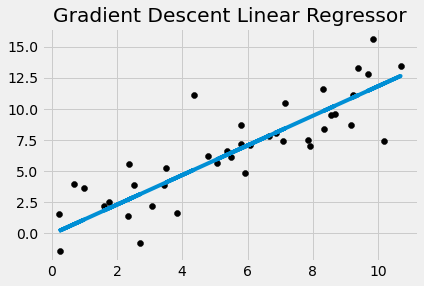

In [12]:
clf = GradientDescentLinearRegression()
clf.fit(sqft, prices)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(sqft, prices, color='black')
plt.plot(sqft, clf.predict(sqft))
plt.gca().set_title("Gradient Descent Linear Regressor")
print('m', clf.m, 'b', clf.b)

In [13]:
gdWeight = 0
gdBias = 0
learning_rate = 0.01
N = df.shape[0]
iterations = 1000

In [14]:
# for _ in range(10):
#     for i in range(iterations):
#         biasDifference = df.price - gdWeight * df.sqft + gdBias
# #         print('biasDifference', biasDifference)
#         biasSum = np.sum(biasDifference)
# #         print('biasSum', biasSum)
#         b_gradient = (-2/N) * biasSum
# #         print('b_gradient', np.round(b_gradient, 3))
#         bias = gdBias + (learning_rate * b_gradient)
#         gdBias = np.round(bias, 3)
#         print('bias', gdBias)

In [15]:
for _ in range(1):
    for i in range(iterations):
        biasDifference = df.price - gdWeight * df.sqft + gdBias
        biasSum = np.sum(biasDifference)
        b_gradient = (-2/N) * biasSum
        bias = gdBias + (learning_rate * b_gradient)
        gdBias = np.round(bias, 3)
#         print('bias', gdBias)
        
        
        weightDifference = df.sqft * (df.price - (gdWeight * df.sqft + gdBias))
#         print('weightDifference', weightDifference)
        weightSum = np.sum(weightDifference)
#         print('weightSum', weightSum)
        w_gradient = (-2/N) * weightSum
#         print('w_gradient', np.round(w_gradient, 3))
        weight = gdWeight - (learning_rate * w_gradient)
        gdWeight = np.round(weight, 3)
print(gdWeight, gdBias)

1.192 -0.083


In [16]:
b_gradient = (-2/N) * biasSum
print(np.round(b_gradient, 3))

0.05


In [17]:
gdBias += learning_rate * b_gradient
print(gdBias)

-0.08250334246412871


# Sklearn Implementation

Coefficients: 
 [[1.10499754]] [0.54441662]
Mean squared error: 4.22
Coefficient of determination: 0.73


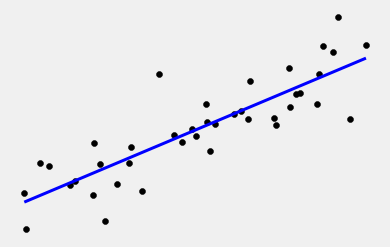

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X = df.sqft.values.reshape(-1, 1)
diabetes_y = df.price.values.reshape(-1,1)


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X, diabetes_y)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X)

# The coefficients
print("Coefficients: \n", regr.coef_, regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X, diabetes_y, color="black")
plt.plot(diabetes_X, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [19]:
regr.intercept_

array([0.54441662])

In [20]:
m = 0
c = 0
learning_rate = 0.01
n = df.shape[0]
iterations = 1
np.random.seed(42)
for i in range(1000): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
    m = m - learning_rate * D_m  # Update m
    c = c - learning_rate * D_c  # Update c
print(m, b)

1.105577362522706 1.1049975422309999


# New Datasets for Gradient Descent

In [ ]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]


In [ ]:
# newnew
for data_index in range(0, 11):
    np.random.seed(50 + data_index)
    n = 30

    X = np.array(sorted(list(range(10))*3)) + np.random.normal(size=n, scale=.5 * data_index)
    x = X
    y = np.array(sorted(list(range(10))*3)) + np.random.normal(size=n, scale=2.25 * data_index)

    x = X + 1
    y = y + 2
    if (data_index == 0):
        df = pd.DataFrame({'sqft': np.round(x, 3), 'price': np.round(y, 3)})
    df[f"sqft{data_index}"] = np.round(x, 3)
    df[f"price{data_index}"] = np.round(y, 3)

    # Initialize layout
    fig, ax = plt.subplots(figsize = (9, 9))

    # Add scatterplot
    ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
    m = 0
    c = 0
    learning_rate = 0.01
    n = df.shape[0]
    iterations = 1
    np.random.seed(42)
    for i in range(1000): 
        Y_pred = m*X + c  # The current predicted value of Y
        D_m = (-2/n) * sum(X * (y - Y_pred))  # Derivative wrt m
        D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
        m = m - learning_rate * D_m  # Update m
        c = c - learning_rate * D_c  # Update c
    print(m, b)
   

1.000993562912867 1.1049975422309999
0.8545508623223932 1.1049975422309999
1.2133935974521888 1.1049975422309999
0.48112545087223524 1.1049975422309999
0.77678446704503 1.1049975422309999
0.6483656545107092 1.1049975422309999
-0.20978425770608125 1.1049975422309999
0.6904264890717592 1.1049975422309999
1.2906813816546399 1.1049975422309999
0.0093199530222614 1.1049975422309999
-0.7368495605594401 1.1049975422309999


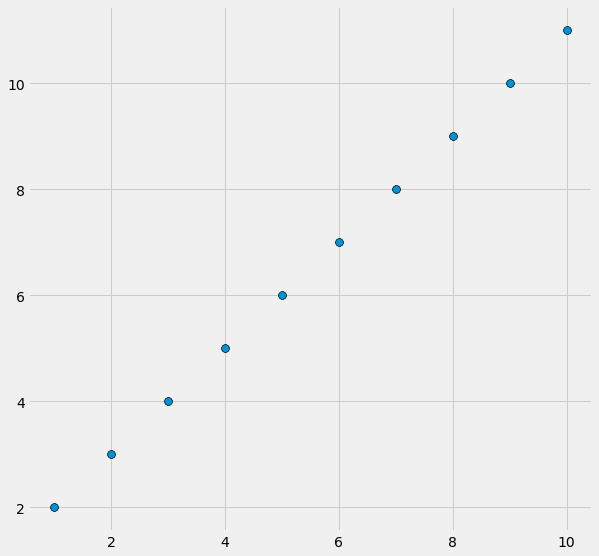

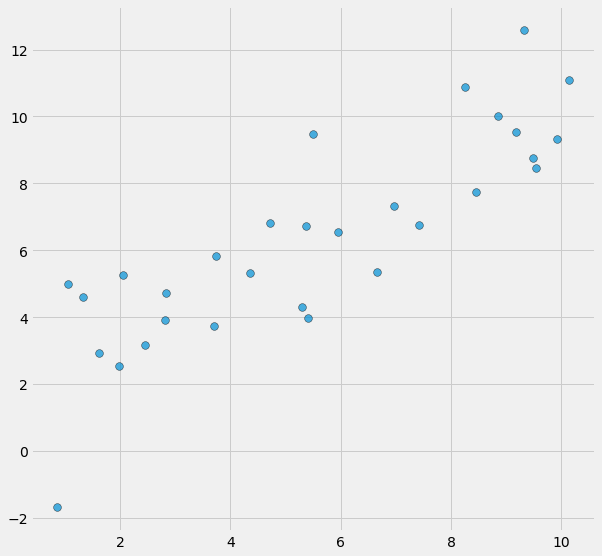

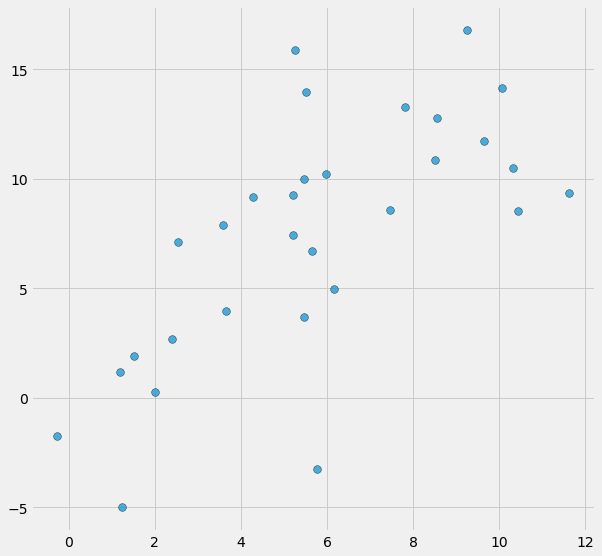

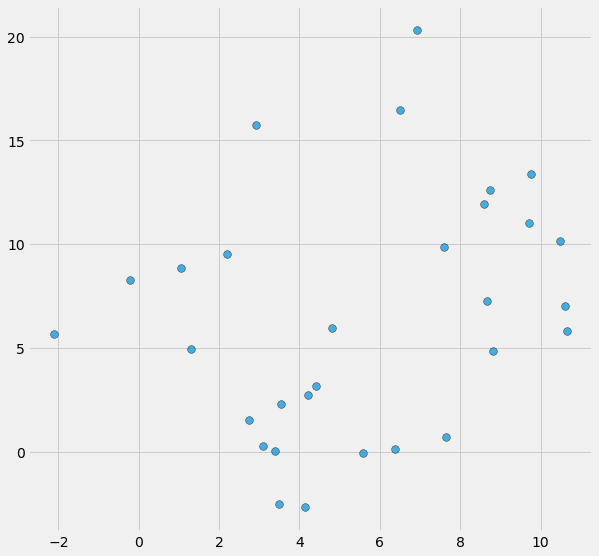

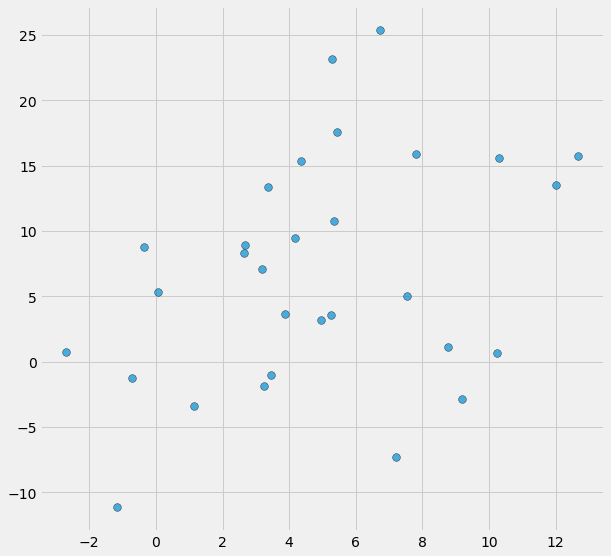

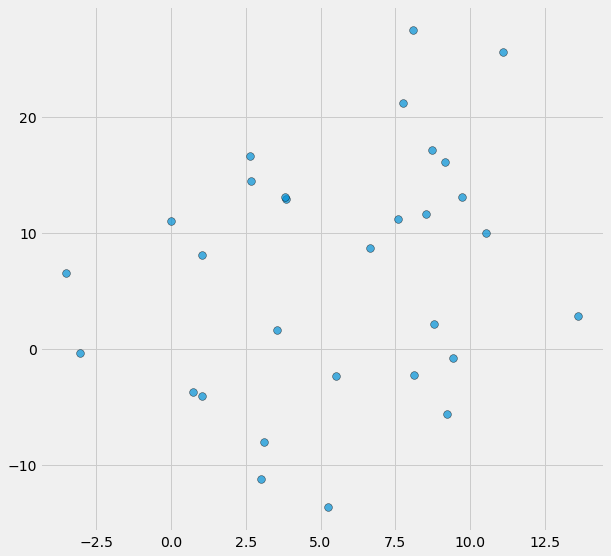

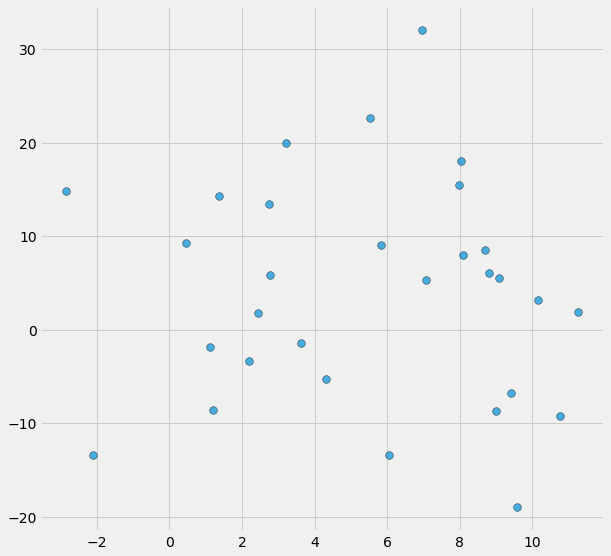

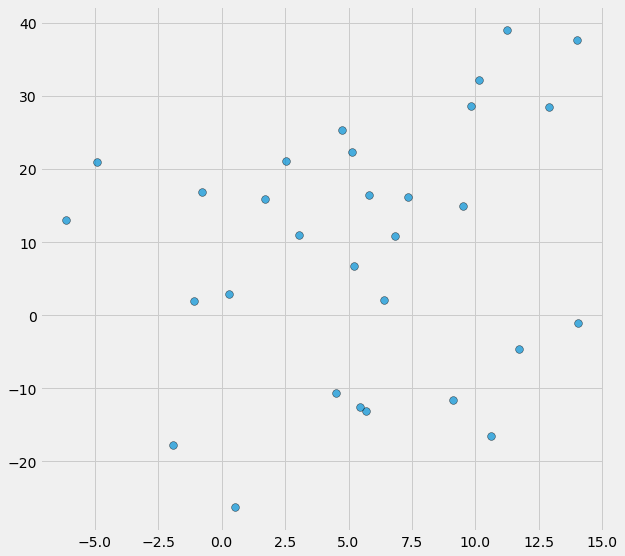

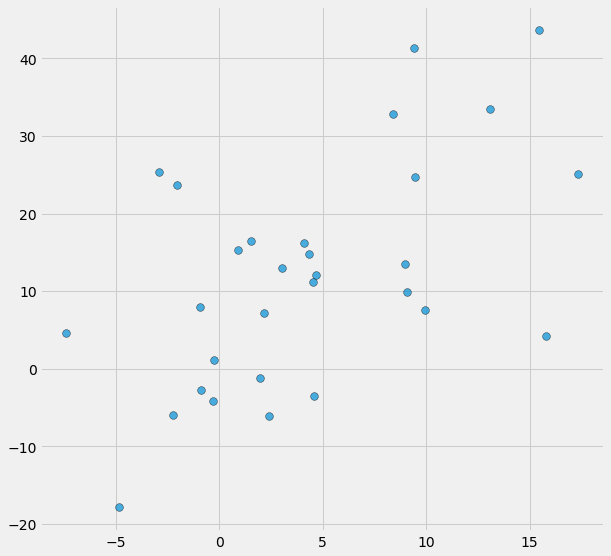

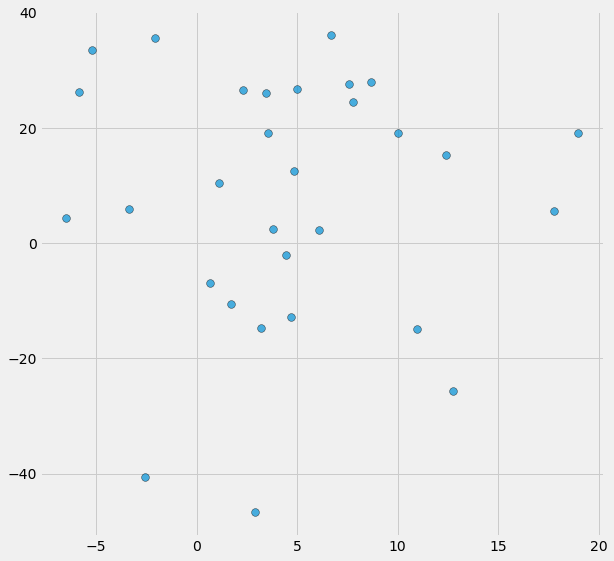

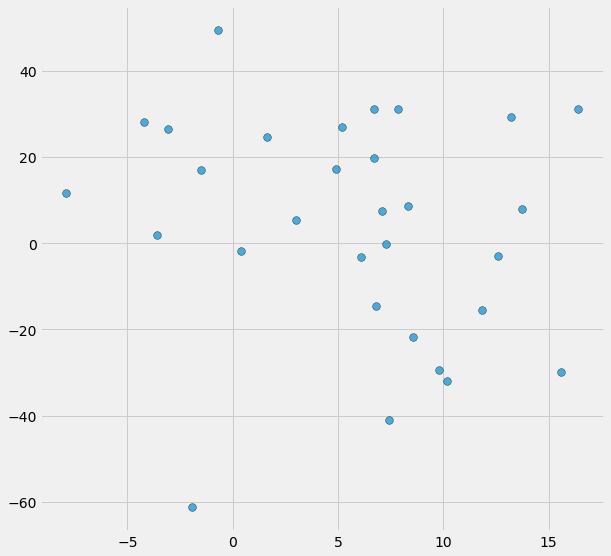

In [21]:
for data_index in range(0, 11):
    np.random.seed(50 + data_index)
    n = 30

    X = np.array(sorted(list(range(10))*3)) + np.random.normal(size=n, scale=.5 * data_index)
    x = X
    y = np.array(sorted(list(range(10))*3)) + np.random.normal(size=n, scale=2.25 * data_index)

    x = X + 1
    y = y + 2
    if (data_index == 0):
        df = pd.DataFrame({'sqft': np.round(x, 3), 'price': np.round(y, 3)})
    df[f"sqft{data_index}"] = np.round(x, 3)
    df[f"price{data_index}"] = np.round(y, 3)

    # Initialize layout
    fig, ax = plt.subplots(figsize = (9, 9))

    # Add scatterplot
    ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
    m = 0
    c = 0
    learning_rate = 0.01
    n = df.shape[0]
    iterations = 1
    np.random.seed(42)
    for i in range(1000): 
        Y_pred = m*X + c  # The current predicted value of Y
        D_m = (-2/n) * sum(X * (y - Y_pred))  # Derivative wrt m
        D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
        m = m - learning_rate * D_m  # Update m
        c = c - learning_rate * D_c  # Update c
    print(m, b)
   

In [55]:
df

,sqft,price,sqft0,price0,sqft1,price1,sqft2,price2,sqft3,price3,...,sqft6,price6,sqft7,price7,sqft8,price8,sqft9,price9,sqft10,price10
0,1.0,2.0,1.0,2.0,0.964,1.716,1.130,1.529,1.077,1.322,...,0.222,4.320,0.885,0.952,0.240,2.776,-0.878,-0.594,-0.152,-3.306
1,2.0,3.0,2.0,3.0,2.014,2.671,1.683,4.650,2.438,1.967,...,2.445,9.914,1.824,-2.705,-0.102,-2.522,2.634,1.112,1.267,-1.052
2,3.0,4.0,3.0,4.0,3.156,3.284,3.060,4.244,2.223,3.792,...,3.827,2.442,1.521,0.306,2.190,0.801,3.473,3.667,4.455,16.832
3,4.0,5.0,4.0,5.0,3.830,5.420,3.799,5.571,3.763,4.109,...,3.616,7.321,3.305,4.703,3.992,9.478,2.198,0.128,2.448,5.197
4,5.0,6.0,5.0,6.0,5.012,5.686,5.004,7.095,5.374,7.538,...,4.801,9.402,6.337,3.237,3.296,0.086,5.711,4.268,2.518,2.206
5,6.0,7.0,6.0,7.0,5.994,6.938,6.099,6.599,6.898,3.521,...,4.787,6.472,7.957,6.367,6.581,11.441,4.659,3.875,7.633,8.227
6,7.0,8.0,7.0,8.0,6.955,7.332,7.320,7.113,6.797,10.926,...,6.796,11.038,4.715,7.107,6.031,5.869,5.611,5.518,7.922,14.564
7,8.0,9.0,8.0,9.0,7.864,8.433,8.165,8.738,8.282,7.218,...,8.709,12.377,8.670,7.299,6.519,5.653,9.994,13.515,8.474,10.576
8,9.0,10.0,9.0,10.0,8.956,9.612,8.886,9.047,8.194,13.048,...,8.530,12.323,10.528,8.662,8.477,16.863,7.737,10.652,9.001,13.155
9,10.0,11.0,10.0,11.0,10.324,10.952,10.366,9.033,9.885,14.104,...,9.801,4.651,8.522,10.803,11.267,20.490,7.531,10.637,8.619,11.324


In [23]:
df.to_json('gradientDescentData2.json', orient='records')

In [54]:
df.shape

(10, 24)

## MSE Data

In [58]:
df

,sqft,price,sqft0,price0,sqft1,price1,sqft2,price2,sqft3,price3,...,price6,sqft7,price7,sqft8,price8,sqft9,price9,sqft10,price10,slope
0,1.0,2.0,1.0,2.0,0.964,1.716,1.130,1.529,1.077,1.322,...,4.320,0.885,0.952,0.240,2.776,-0.878,-0.594,-0.152,-3.306,1.092297
1,2.0,3.0,2.0,3.0,2.014,2.671,1.683,4.650,2.438,1.967,...,9.914,1.824,-2.705,-0.102,-2.522,2.634,1.112,1.267,-1.052,2.266595
2,3.0,4.0,3.0,4.0,3.156,3.284,3.060,4.244,2.223,3.792,...,2.442,1.521,0.306,2.190,0.801,3.473,3.667,4.455,16.832,3.440893
3,4.0,5.0,4.0,5.0,3.830,5.420,3.799,5.571,3.763,4.109,...,7.321,3.305,4.703,3.992,9.478,2.198,0.128,2.448,5.197,4.615190
4,5.0,6.0,5.0,6.0,5.012,5.686,5.004,7.095,5.374,7.538,...,9.402,6.337,3.237,3.296,0.086,5.711,4.268,2.518,2.206,5.789487
5,6.0,7.0,6.0,7.0,5.994,6.938,6.099,6.599,6.898,3.521,...,6.472,7.957,6.367,6.581,11.441,4.659,3.875,7.633,8.227,6.963785
6,7.0,8.0,7.0,8.0,6.955,7.332,7.320,7.113,6.797,10.926,...,11.038,4.715,7.107,6.031,5.869,5.611,5.518,7.922,14.564,8.138082
7,8.0,9.0,8.0,9.0,7.864,8.433,8.165,8.738,8.282,7.218,...,12.377,8.670,7.299,6.519,5.653,9.994,13.515,8.474,10.576,9.312380
8,9.0,10.0,9.0,10.0,8.956,9.612,8.886,9.047,8.194,13.048,...,12.323,10.528,8.662,8.477,16.863,7.737,10.652,9.001,13.155,10.486677
9,10.0,11.0,10.0,11.0,10.324,10.952,10.366,9.033,9.885,14.104,...,4.651,8.522,10.803,11.267,20.490,7.531,10.637,8.619,11.324,11.660975


(10, 25)
1.155 -0.084


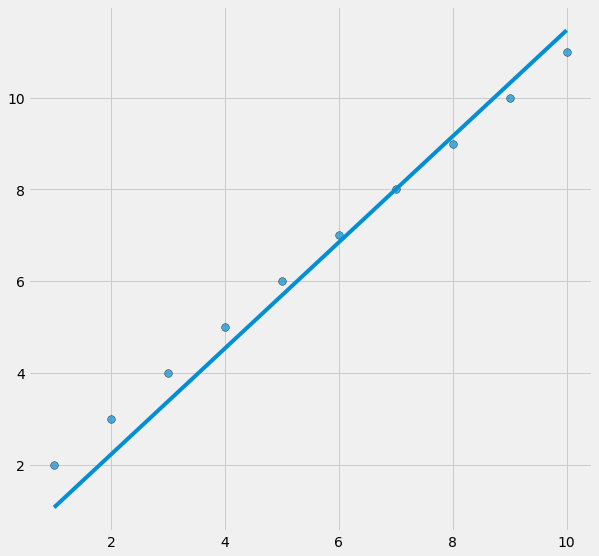

In [64]:
# bree
print(df.shape)
for i in range(iterations):
    biasDifference = df['price0'] - gdWeight * df['sqft0'] + gdBias
    biasSum = np.sum(biasDifference)
    b_gradient = (-2/N) * biasSum
    bias = gdBias + (learning_rate * b_gradient)
    gdBias = np.round(bias, 3)


    weightDifference = df['sqft0'] * (df['price0'] - (gdWeight * df['sqft0'] + gdBias))
#         print('weightDifference', weightDifference)
    weightSum = np.sum(weightDifference)
#         print('weightSum', weightSum)
    w_gradient = (-2/N) * weightSum
#         print('w_gradient', np.round(w_gradient, 3))
    weight = gdWeight - (learning_rate * w_gradient)
    gdWeight = np.round(weight, 3)
print(gdWeight, gdBias)

df['slope'] = df['sqft0'] * weight + gdBias
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(df['sqft0'], df['price0'], s=60, alpha=0.7, edgecolors="k")
ax.plot(df['sqft0'], df['slope'])

Coefficients: 
 [[1.]] [1.]
Mean squared error: 0.00
Coefficient of determination: 1.00


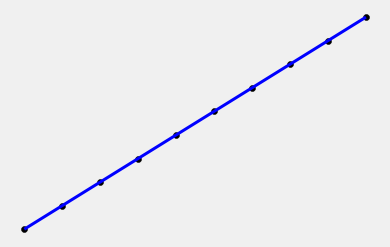

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X = df['sqft0'].values.reshape(-1, 1)
diabetes_y = df['price0'].values.reshape(-1,1)


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X, diabetes_y)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X)

# The coefficients
print("Coefficients: \n", regr.coef_, regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X, diabetes_y, color="black")
plt.plot(diabetes_X, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

0.9999999999999962 1.0000000000000262


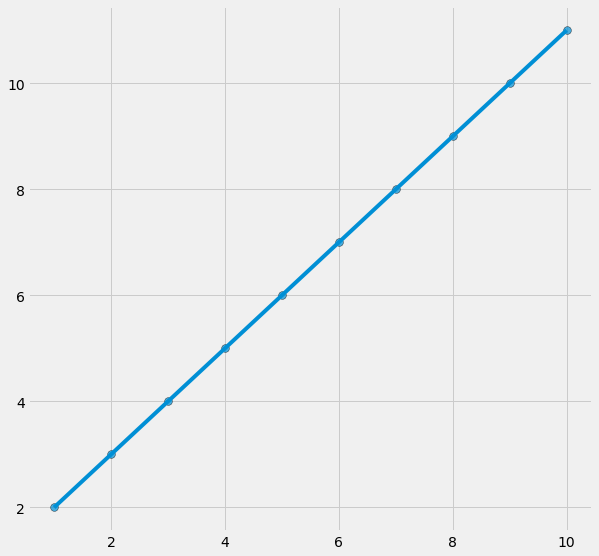

In [80]:
m = 0
c = 4
for i in range(10000): 
    Y_pred = m * df['sqft0'] + c  # The current predicted value of Y
    
    D_m = (-2/n) * sum(df['sqft0'] * (df['price0'] - Y_pred))  # Derivative wrt m

    D_c = (-2/n) * sum(df['price0'] - Y_pred)  # Derivative wrt c

    m = m - learning_rate * D_m  # Update m
    c = c - learning_rate * D_c  # Update c
print(m, c)
   
    
df['slope'] = df['sqft0'] * m + c
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(df['sqft0'], df['price0'], s=60, alpha=0.7, edgecolors="k")
ax.plot(df['sqft0'], df['slope'])

In [76]:
print(learning_rate)

0.01


1.000993562912867 440.83990999648205
0.9844830002869456 440.83990999648205
0.7202389208878056 440.83990999648205
1.2942823920135345 440.83990999648205
1.0868162792782332 440.83990999648205
0.9401767365411914 440.83990999648205
0.4903059097663217 440.83990999648205
1.0218483702834953 440.83990999648205
1.8566891168536317 440.83990999648205
1.451023022366211 440.83990999648205
1.556772094898968 440.83990999648205


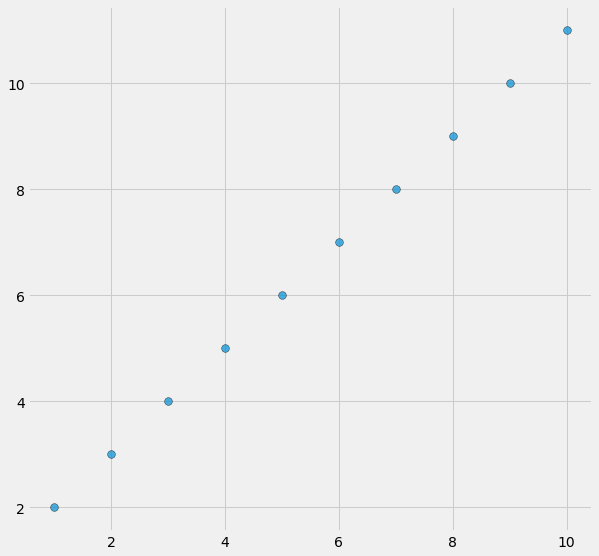

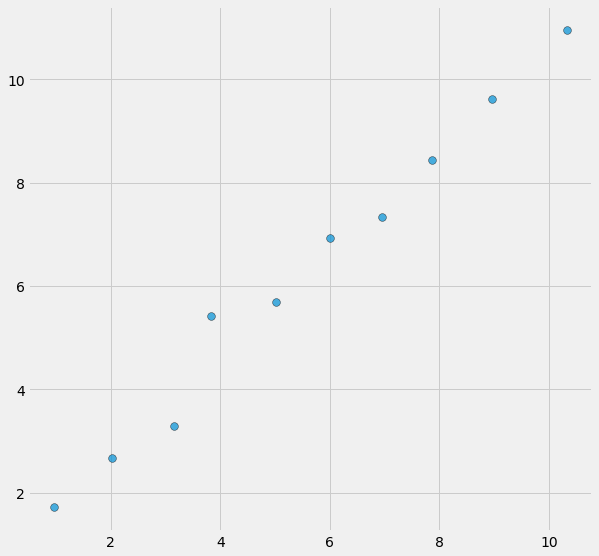

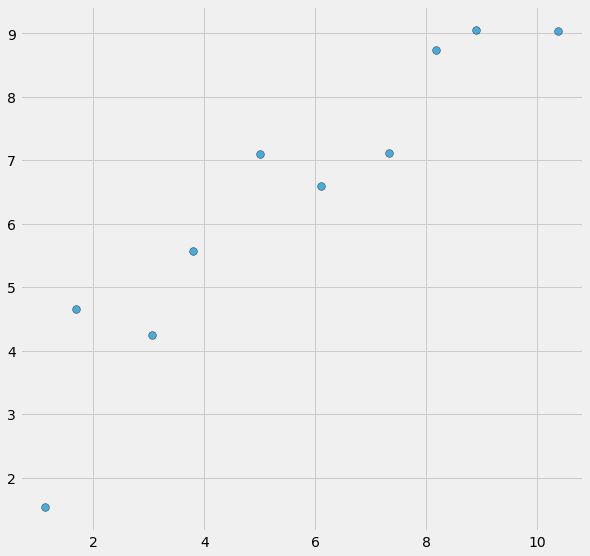

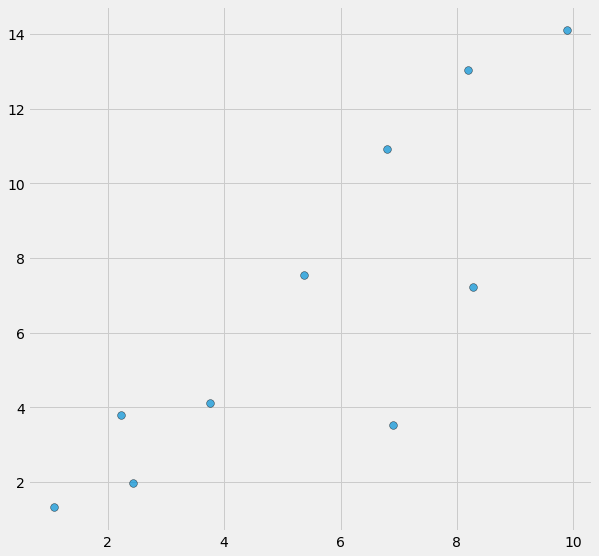

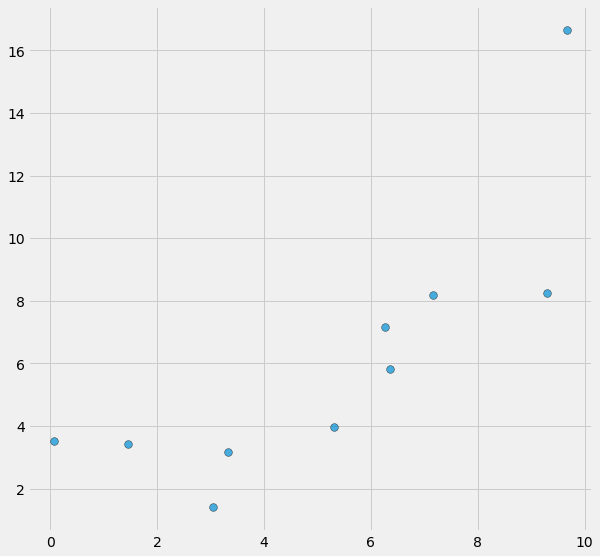

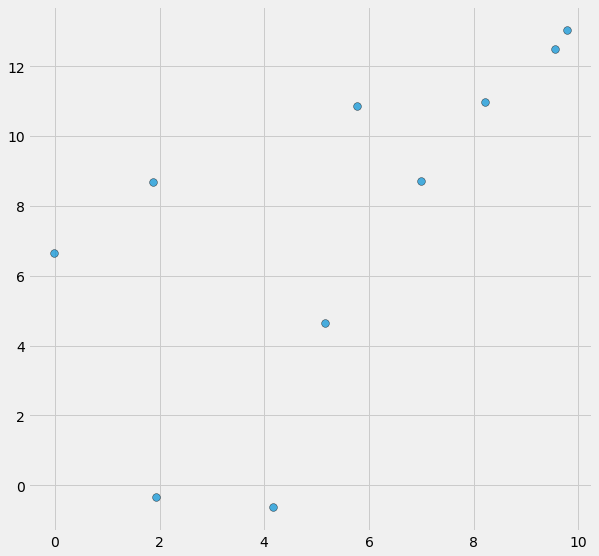

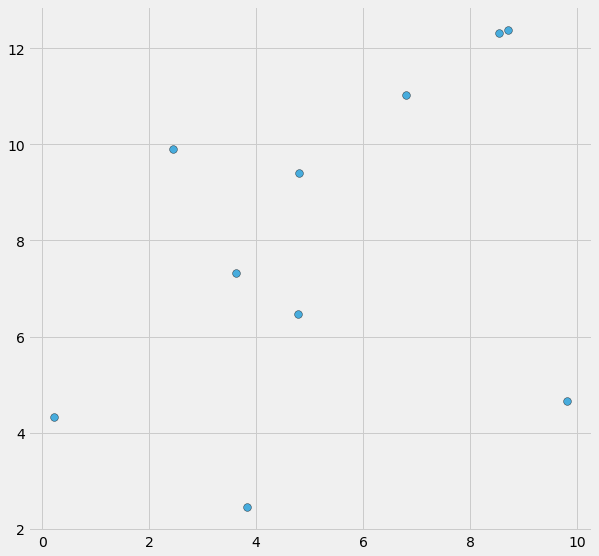

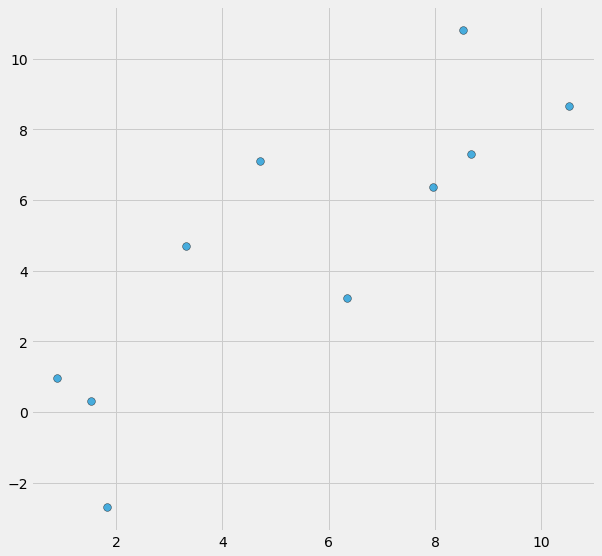

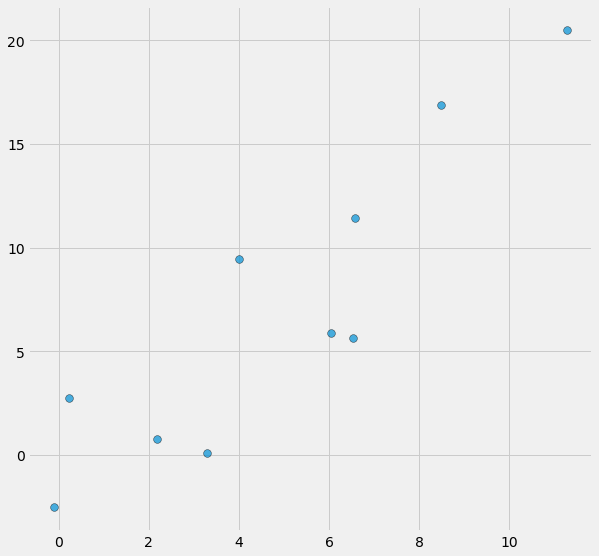

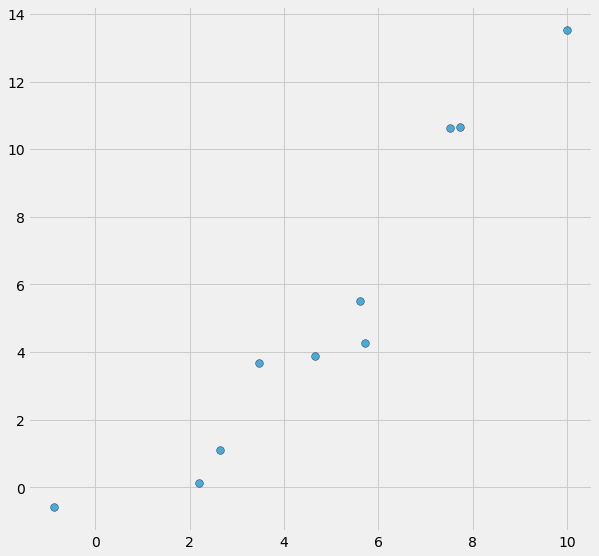

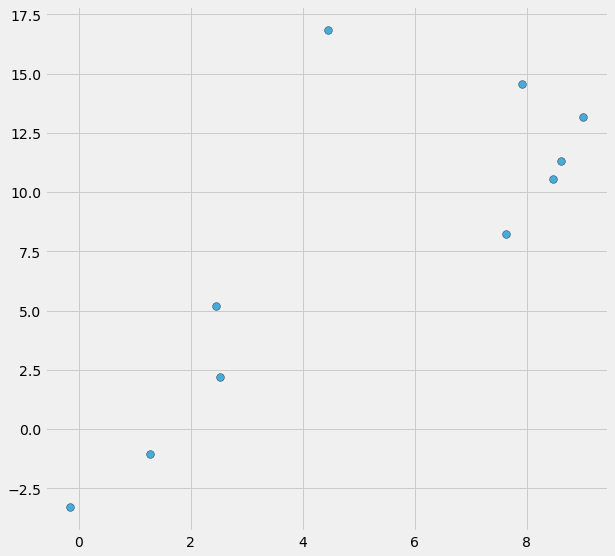

In [50]:
for data_index in range(0, 11):
    np.random.seed(50 + data_index)
    n = 10

    X = np.array(sorted(list(range(10)))) + np.random.normal(size=n, scale=.5 * (data_index/4))
    x = X
    y = np.array(sorted(list(range(10)))) + np.random.normal(size=n, scale=2.25 * (data_index/4))

    x = X + 1
    y = y + 2
    if (data_index == 0):
        df = pd.DataFrame({'sqft': np.round(x, 3), 'price': np.round(y, 3)})
    df[f"sqft{data_index}"] = np.round(x, 3)
    df[f"price{data_index}"] = np.round(y, 3)

    # Initialize layout
    fig, ax = plt.subplots(figsize = (9, 9))

    # Add scatterplot
    ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
    m = 0
    c = 0
    learning_rate = 0.01
    n = df.shape[0]
    iterations = 1
    np.random.seed(42)
    for i in range(1000): 
        Y_pred = m*X + c  # The current predicted value of Y
        D_m = (-2/n) * sum(X * (y - Y_pred))  # Derivative wrt m
        D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
        m = m - learning_rate * D_m  # Update m
        c = c - learning_rate * D_c  # Update c
    print(m, b)
   

In [26]:
df.to_json('mseData.json', orient='records')

# Make Interpretatation Datasets:

1. binary feature
2. continuous feature
3. both features
4. interaction term

In [27]:
np.random.seed(50)
n = 40

X = np.array(sorted(list(range(10))*4)) + np.random.normal(size=n, scale=.5)
y = np.array(sorted(list(range(10))*4)) + np.random.normal(size=n, scale=2.25)
has_pool = [0] * 20 + [1] * 20
np.random.shuffle(has_pool)
# generate prices to be roughly $600 per square-foot
# sqft = [220, 500, 550, 600, 750, 800, 900, 920, 1385, 1200, 1400, 1500, 1550, 1800, 2000]
# prices = [np.round(i * np.random.normal(600, 200), 0)**(1/2) for i in sqft]
sqft = X + 1
prices = y + 2
df = pd.DataFrame({'sqft': sqft, 'price': prices, 'pool': has_pool})
df.head()
df.to_json('interpretationData.json', orient='records')

In [28]:
df

,sqft,price,pool
0,0.219824,1.549063,1
1,0.984511,3.671836,1
2,0.689536,3.929064,0
3,0.267710,-1.388926,0
4,2.705973,-0.749292,1
5,1.761634,2.507262,0
6,1.609765,2.192569,1
7,2.535134,3.851687,0
8,2.358854,5.539485,1
9,2.336261,1.372324,1


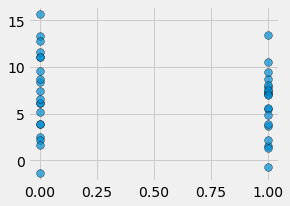

In [29]:
 # Initialize layout
fig, ax = plt.subplots(figsize = (4, 3))
ax.scatter(df.pool, df.price, s=60, alpha=0.7, edgecolors="k")

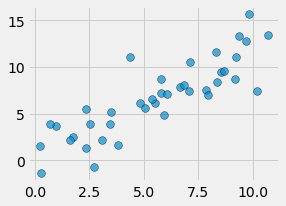

In [30]:
 # Initialize layout
fig, ax = plt.subplots(figsize = (4, 3))
ax.scatter(df.sqft, df.price, s=60, alpha=0.7, edgecolors="k")

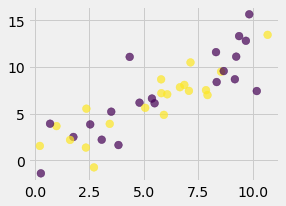

In [31]:
 # Initialize layout
fig, ax = plt.subplots(figsize = (4, 3))
ax.scatter(df.sqft, df.price, s=60, alpha=0.7, c=df.pool)

In [32]:
np.random.normal(80000, 15)

79995.29154302095

make a list of fake house prices
house prices should be ~normally distributed as sqft * (N(300, 80))
to add swimming pools: make a random list of 0,1
if 1: add N(80, 20)
otherwise, don't

In [33]:
np.random.seed(50)
sqft = [220, 140, 180, 200, 245, 500, 510, 550, 750, 630, 680, 600, 654, 385, 202, 275]
prices = [np.round(i * np.random.normal(500, 150), 0)for i in sqft]
has_pool = [0] * int((len(sqft) / 2)) + [1] * int((len(sqft) / 2))
np.random.shuffle(has_pool)
df = pd.DataFrame({'sqft': sqft, 'price': prices, 'pool': has_pool})
df.loc[df.pool == 1, 'price']  += np.random.normal(40000, 25000) 
df.head()

,sqft,price,pool
0,220,58508.000000,0
1,140,69349.000000,0
2,180,73235.000000,0
3,200,56063.000000,0
4,245,239297.026856,1


intercept:  5912.29557265637 slope:  579.0473596391074


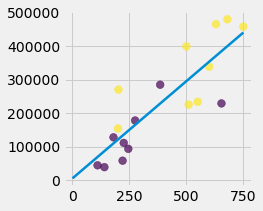

In [34]:
np.random.seed(50)
sqft = [220, 225, 110, 140, 180, 200, 245, 500, 510, 550, 750, 630, 680, 600, 654, 385, 202, 275]
prices = [np.round(i * np.random.normal(500, 150), 0)for i in sqft]
has_pool = [0] * int((len(sqft) / 2)) + [1] * int((len(sqft) / 2))
np.random.shuffle(has_pool)
df = pd.DataFrame({'sqft': sqft, 'price': prices, 'pool': has_pool})
df.loc[df.pool == 1, 'price']  += np.random.normal(40000, 25000) 
df.head()

fig, ax = plt.subplots(figsize = (3, 3))
ax.scatter(df.sqft, df.price, s=60, alpha=0.7, c = df.pool)

b, a = np.polyfit(df.sqft, df.price, deg=1)
print('intercept: ', a, 'slope: ', b)
# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, np.max(df.sqft), num=1000)
ax.plot(xseq, a + b * xseq,  lw=2.5);

intercept:  129792.11111111114 slope:  206213.49888015105


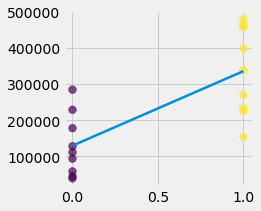

In [35]:
fig, ax = plt.subplots(figsize = (3, 3))
ax.scatter(df.pool, df.price, s=60, alpha=0.7, c = df.pool)

b, a = np.polyfit(df.pool, df.price, deg=1)
print('intercept: ', a, 'slope: ', b)
# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, np.max(df.pool), num=1000)
ax.plot(xseq, a + b * xseq,  lw=2.5);

intercept:  129792.11111111114 slope:  206213.49888015105


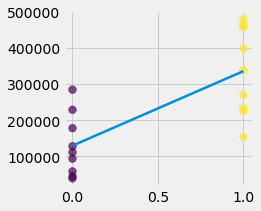

In [36]:
fig, ax = plt.subplots(figsize = (3, 3))
ax.scatter(df.pool, df.price, s=60, alpha=0.7, c = df.pool)

b, a = np.polyfit(df.pool, df.price, deg=1)
print('intercept: ', a, 'slope: ', b)
# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, np.max(df.pool), num=1000)
ax.plot(xseq, a + b * xseq,  lw=2.5);

[  440.83991    99040.41853878]
10569.406563173688


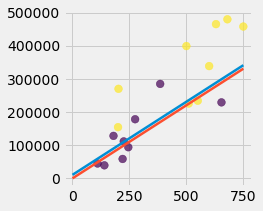

In [37]:
from sklearn.linear_model import LinearRegression
X = df[['sqft', 'pool']]
y = df['price']
regressor = LinearRegression()
regressor.fit(X, y)
b, a = [regressor.intercept_, regressor.coef_[1]]
b = regressor.coef_[0]
a = regressor.intercept_
# display coefficients
print(regressor.coef_)
print(regressor.intercept_)

fig, ax = plt.subplots(figsize = (3, 3))
ax.scatter(df.sqft, df.price, s=60, alpha=0.7, c = df.pool)
xseq = np.linspace(0, np.max(df.sqft), num=1000)
ax.plot(xseq, a + b * xseq,  lw=2.5);
ax.plot(xseq, 0*a + b * xseq,  lw=2.5);

In [38]:
from sklearn.preprocessing import PolynomialFeatures
# Create interaction term (not polynomial features)
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)
# Create linear regression
regr = LinearRegression()

# Fit the linear regression
model = regr.fit(X_inter, y)

# Data For Interpretation Section

make a list of fake house prices
house prices should be ~normally distributed as sqft * (N(300, 80))
to add swimming pools: make a random list of 0,1
if 1: add N(80, 20)
otherwise, don't

In [39]:
np.random.seed(2)
sqft = [220, 180, 230, 640, 125, 410, 140, 180, 480, 245, 500, 510, 550, 750, 630, 680, 300, 654, 385, 730, 685, 653 ]
prices = [np.round(i * np.random.normal(700, 150), 0)for i in sqft]
has_pool = [0] * int((len(sqft) / 2)) + [1] * int((len(sqft) / 2))
# np.random.shuffle(has_pool)
df = pd.DataFrame({'sqft': sqft, 'price': prices, 'pool': has_pool})
df.loc[df.pool == 1, 'price']  += np.random.normal(55000, 10000)
df.to_json('interpretationData.json', orient='records')
df.head()

,sqft,price,pool
0,220,140247.0,0
1,180,124481.0,0
2,230,87301.0,0
3,640,605466.0,0
4,125,53873.0,0


## One Binary Feature

intercept: 203347.18181818168 slope: 270464.2499745584


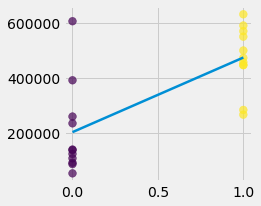

In [40]:
# single binary feature
fig, ax = plt.subplots(figsize = (3, 3))
ax.scatter(df.pool, df.price, s=60, alpha=0.7, c = df.pool)
slope, intercept = np.polyfit(df.pool, df.price, deg=1)
xseq = np.linspace(0, np.max(df.pool), num=10)
ax.plot(xseq, intercept + slope * xseq,  lw=2.5)
print('intercept:', intercept, 'slope:', slope)

## One Continuous Feature

intercept: -39591.32975518053 slope: 842.336134892591


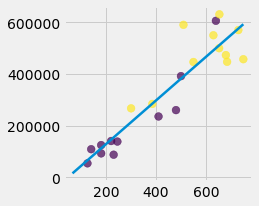

In [41]:
# single continuous feature
fig, ax = plt.subplots(figsize = (3, 3))
ax.scatter(df.sqft, df.price, s=60, alpha=0.7, c = df.pool)
slope, intercept = np.polyfit(df.sqft, df.price, deg=1)
xseq = np.linspace(65, np.max(df.sqft), num=10)
ax.plot(xseq, intercept + slope * xseq,  lw=2.5)
print('intercept:', intercept, 'slope:', slope)

## Multivariate

[  756.86922265 51866.65721553]
-27153.8996242907
intercept: -27153.8996242907 slope: 51866.65721553277


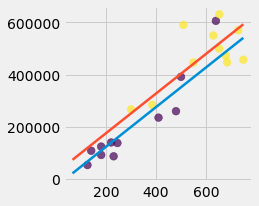

In [42]:
# both predictors
from sklearn.linear_model import LinearRegression
X = df[['sqft', 'pool']]
y = df['price']
regressor = LinearRegression()
regressor.fit(X, y)
intercept, slope = [regressor.intercept_, regressor.coef_[1]]

# display coefficients
print(regressor.coef_)
print(regressor.intercept_)

# single continuous feature
fig, ax = plt.subplots(figsize = (3, 3))
ax.scatter(df.sqft, df.price, s=60, alpha=0.7, c = df.pool)
xseq = np.linspace(65, np.max(df.sqft), num=10)
ax.plot(xseq, intercept + regressor.coef_[0] * xseq,  lw=2.5)
ax.plot(xseq, intercept + regressor.coef_[0] * xseq + regressor.coef_[1] * 1,  lw=2.5)
print('intercept:', intercept, 'slope:', slope)

## Multivariate With Interaction

[   898.53093166 217110.50090155   -347.4400996 ]
-70296.32918611926
intercept: -70296.32918611926 slope: [   898.53093166 217110.50090155   -347.4400996 ]


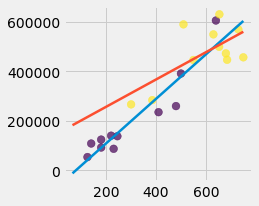

In [43]:
# regression with interaction

from sklearn.preprocessing import PolynomialFeatures
# Create interaction term (not polynomial features)
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)
# Create linear regression
regr = LinearRegression()

# Fit the linear regression
regressor = regr.fit(X_inter, y)
# display coefficients
print(regressor.coef_)
print(regressor.intercept_)

intercept = regressor.intercept_
coef = regressor.coef_

# single continuous feature
fig, ax = plt.subplots(figsize = (3, 3))
ax.scatter(df.sqft, df.price, s=60, alpha=0.7, c = df.pool)
xseq = np.linspace(65, np.max(df.sqft), num=10)
ax.plot(xseq, intercept + coef[0] * xseq + coef[1]*0 + coef[2]*0 ,  lw=2.5)
ax.plot(xseq, intercept + coef[0] * xseq + coef[1]*1 + coef[2]*1*xseq ,  lw=2.5)
print('intercept:', intercept, 'slope:', coef)

todo: figure out how to plot regression lines

# mom iq

In [44]:
df = pd.read_csv("https://raw.githubusercontent.com/mariocastro73/ML2020-2021/master/datasets/kidiq.csv")
df

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27
...,...,...,...,...,...
429,94,0,84.877412,4,21
430,76,1,92.990392,4,23
431,50,0,94.859708,2,24
432,88,1,96.856624,2,21


intercept: 10569.406563173688 slope: 440.83990999648205


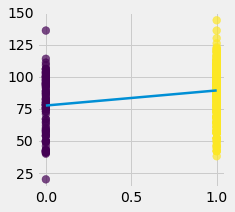

In [45]:
# single binary feature
fig, ax = plt.subplots(figsize = (3, 3))
ax.scatter(df.mom_hs, df.kid_score, s=60, alpha=0.7, c = df.mom_hs)
slope, intercept = np.polyfit(df.mom_hs, df.kid_score, deg=1)
xseq = np.linspace(0, np.max(df.mom_hs), num=10)
ax.plot(xseq, intercept + slope * xseq,  lw=2.5)
print('intercept:', a, 'slope:', b)

intercept: 10569.406563173688 slope: 440.83990999648205


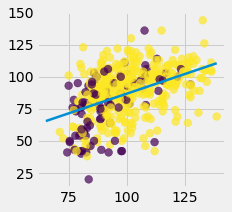

In [46]:
# single continuous feature
fig, ax = plt.subplots(figsize = (3, 3))
ax.scatter(df.mom_iq, df.kid_score, s=60, alpha=0.7, c = df.mom_hs)
slope, intercept = np.polyfit(df.mom_iq, df.kid_score, deg=1)
xseq = np.linspace(65, np.max(df.mom_iq), num=10)
ax.plot(xseq, intercept + slope * xseq,  lw=2.5)
print('intercept:', a, 'slope:', b)

[0.56390605 5.95011691]
25.731538175096006
intercept: 10569.406563173688 slope: 440.83990999648205


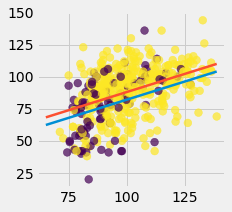

In [47]:
# both predictors
from sklearn.linear_model import LinearRegression
X = df[['mom_iq', 'mom_hs']]
y = df['kid_score']
regressor = LinearRegression()
regressor.fit(X, y)
intercept, slope = [regressor.intercept_, regressor.coef_[1]]

# display coefficients
print(regressor.coef_)
print(regressor.intercept_)

# single continuous feature
fig, ax = plt.subplots(figsize = (3, 3))
ax.scatter(df.mom_iq, df.kid_score, s=60, alpha=0.7, c = df.mom_hs)
# slope, intercept = np.polyfit(df.mom_iq, df.kid_score, deg=1)
xseq = np.linspace(65, np.max(df.mom_iq), num=10)
ax.plot(xseq, intercept + regressor.coef_[0] * xseq,  lw=2.5)
ax.plot(xseq, intercept + regressor.coef_[0] * xseq + regressor.coef_[1] * 1,  lw=2.5)
print('intercept:', a, 'slope:', b)

[ 0.96888921 51.26822343 -0.48427467]
-11.48202114202499
intercept: 10569.406563173688 slope: 440.83990999648205


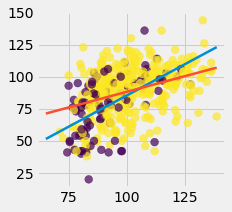

In [48]:
# regression with interaction

from sklearn.preprocessing import PolynomialFeatures
# Create interaction term (not polynomial features)
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)
# Create linear regression
regr = LinearRegression()

# Fit the linear regression
regressor = regr.fit(X_inter, y)
# display coefficients
print(regressor.coef_)
print(regressor.intercept_)

intercept = regressor.intercept_
coef = regressor.coef_

# single continuous feature
fig, ax = plt.subplots(figsize = (3, 3))
ax.scatter(df.mom_iq, df.kid_score, s=60, alpha=0.7, c = df.mom_hs)
xseq = np.linspace(65, np.max(df.mom_iq), num=10)
ax.plot(xseq, intercept + coef[0] * xseq + coef[1]*0 + coef[2]*0 ,  lw=2.5)
ax.plot(xseq, intercept + coef[0] * xseq + coef[1]*1 + coef[2]*1*xseq ,  lw=2.5)
print('intercept:', a, 'slope:', b)